In [33]:
#Ejercicio 1

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def filtro(img, m_filt): 
    resimg = img.copy()
    
    [fila, columna] = resimg.shape
    matriz_res = np.zeros((fila,columna))
    
    [f,c] = m_filt.shape
    filtro = np.zeros((fila,columna))
    
    for i in range(1,fila-1):
        for j in range(1, columna-1):
            filtro_res = resimg[i-1:i+2, j-1:j+2]
            filtro = filtro_res * m_filt
            matriz_res[i,j] = round(filtro.sum() / m_filt.sum())
    return matriz_res

#Primero creamos una matriz base de del tamaño de la imagen rellena de ceros, después creamos otra del tamaño del filtro 
#(el cuadrado amarillo del ejemplo práctico),para el filtro utilizamos un bucle de filas y columnas empezando por 1 y 
#acabando en tamaño -1, así aseguramos que la primera y última fila y columna sean ceros, luego utilizamos la fórmula general
#primero tomamos una matriz del tamaño del filtro(3x3 en este caso) dentro de la matriz de la imagen, luego la multiplicamos por
#el filtro para tener la matriz superior de la fracción de la fórmula, por último dividimos el sumatorio de la matriz anterior
#entr el sumatorio de la matriz del filtro y se la añadimos a la matriz final matriz_res

In [35]:
img = np.array([
    [12,14,17,24,32,30],
    [19,18,17,26,36,40],
    [26,21,17,28,40,42],
    [20,19,18,26,33,35],
    [14,17,20,23,27,20],
    [35,14,22,13,40,21]
])

m_filt = np.array([
    [1,1,1],
    [1,2,1],
    [1,1,1]
])

print(filtro(img,m_filt))

[[ 0.  0.  0.  0.  0.  0.]
 [ 0. 18. 20. 26. 33.  0.]
 [ 0. 20. 21. 27. 35.  0.]
 [ 0. 19. 21. 26. 31.  0.]
 [ 0. 20. 19. 24. 26.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


In [36]:
#Ejercicio 2

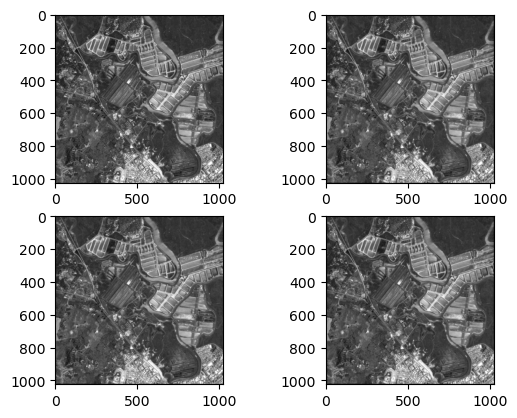

In [37]:
img = cv2.imread('ISS_Spain_IslaCristina_monobanda.jpg', cv2.IMREAD_GRAYSCALE)

media = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

resimg1 = filtro(img,media)

media_imagen = np.array([
    [1,1,1],
    [1,2,1],
    [1,1,1]
])

resimg2 = filtro(img,media_imagen)

gaussiano = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

resimg3 = filtro(img,gaussiano)

fig, axs = plt.subplots(2,2)

axs[0,0].imshow(img, cmap='gray')
axs[0,1].imshow(resimg1, cmap='gray')
axs[1,0].imshow(resimg2, cmap='gray')
axs[1,1].imshow(resimg3, cmap='gray')

#En este caso utilizamos la función filtro creada anteriormente y le pasamos las diferentes matrices de filtro

In [38]:
#Ejercicio 3

In [39]:
def mediana(img): 
    resimg = img.copy()
    
    [fila, columna] = resimg.shape
    matriz_res = np.zeros((fila,columna))

    for i in range(1,fila-1):
        for j in range(1, columna-1):
            filtro_res = resimg[i-1:i+2, j-1:j+2]
            fila_el = sorted(np.reshape(filtro_res,(1,9)))
            medio= np.median(fila_el)
            matriz_res[i,j] = medio
    return matriz_res

#los procesos del inicio son los mismos que en la matriz filtro exceptuando la creación de la matriz 3x3 del filtro, que se
#genera más tarde, en filtro_res cargamos la matriz a filtrar, en fila_el ordenamos de menor a mayor una lista con los valores
#de la matriz filtro_res(para el reshape, metemos primero la matriz a la que le pasaremos la función y en lo que queremos
# transformarla, en este caso en una matriz de 1 fila y 9 columnas(3x3)), le hacemos la mediana a fila_el y cargamos el valor 
#en la matriz_res

In [40]:
img = np.array([
    [12,14,17,24,32,30],
    [19,18,17,26,36,40],
    [26,21,17,28,40,42],
    [20,19,18,26,33,35],
    [14,17,20,23,27,20],
    [35,14,22,13,40,21]
])

print(mediana(img))

[[ 0.  0.  0.  0.  0.  0.]
 [ 0. 17. 18. 26. 32.  0.]
 [ 0. 19. 19. 26. 35.  0.]
 [ 0. 19. 20. 26. 28.  0.]
 [ 0. 19. 19. 23. 26.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


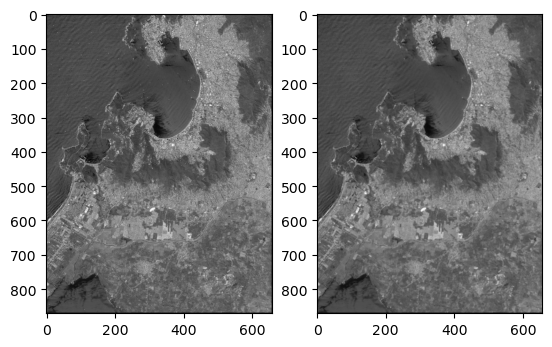

In [41]:
img = cv2.imread('WorldView_1-1_PAN.png', cv2.IMREAD_GRAYSCALE)
resimg = mediana(img)

fig, axs = plt.subplots(1,2)

axs[0].imshow(img, cmap='gray')
axs[1].imshow(resimg, cmap='gray')

In [42]:
#Ejercicio 4

In [43]:
def sobel(img): 
    resimg = img.copy()
    
    [fila, columna] = resimg.shape
    matriz_res = np.zeros((fila,columna))

    for i in range(1,fila-1):
        for j in range(1, columna-1):
            filtro_res = resimg[i-1:i+2, j-1:j+2]
            
            c = (filtro_res[0,2] + filtro_res[1,2] * 2 + filtro_res[2,2]) - (filtro_res[0,0] + filtro_res[1,0]*2 + filtro_res[2,0])
            f = (filtro_res[0,0] + filtro_res[0,1] * 2 + filtro_res[0,2]) - (filtro_res[2,0] + filtro_res[2,1]*2 + filtro_res[2,2])
            
            raiz_res = (pow(c,2)+pow(f,2))**(1/2)
            
            matriz_res[i,j] = round(raiz_res)
    return matriz_res

#los procesos del inicio son los mismos que en la matriz filtro exceptuando la creación de la matriz 3x3 del filtro, en 
#filtro_res cargamos la matriz a filtrar, después añadimos a las variables c y f los valores que nos muestra en la hoja de 
#práctica, hacemos la raíz de la suma de los cuadrados de c y f(con pow(x,y)elevamos x a y, he probado a hacerlo con ** pero
#falla) y por último añadimos el valor de la raiz a matriz_res

In [44]:
img = np.array([
    [12,14,17,24,32,30],
    [19,18,17,26,36,40],
    [26,21,17,28,40,42],
    [20,19,18,26,33,35],
    [14,17,20,23,27,20],
    [35,14,22,13,40,21]
])

print(sobel(img))

[[ 0.  0.  0.  0.  0.  0.]
 [ 0. 29. 35. 78. 58.  0.]
 [ 0. 22. 29. 80. 52.  0.]
 [ 0. 18. 27. 63. 60.  0.]
 [ 0.  9. 21. 49. 17.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


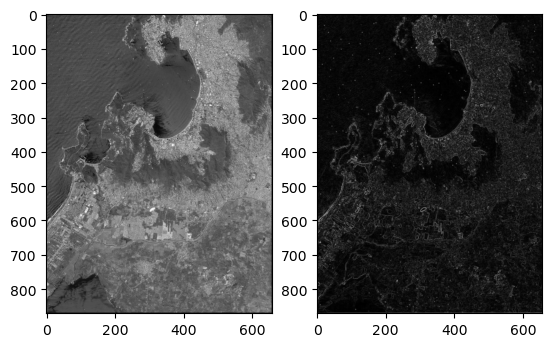

In [45]:
img = cv2.imread('WorldView_1-1_PAN.png', cv2.IMREAD_GRAYSCALE)
resimg = sobel(img)

fig, axs = plt.subplots(1,2)

axs[0].imshow(img, cmap='gray')
axs[1].imshow(resimg, cmap='gray')